# Linear Regression and Logistic Regression with PyTorch

- 선형 회귀: 회귀 문제
    - Uses MSE as loss function
    - Simple Linear Regression: 
    $y = wx + b$
    - Multivariable Linear Regression: 
    $y = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$
- 로지스틱 회귀: 분류 문제
    - Uses Sigmoid+BCE or Softmax+CE as loss function

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Autograd

In [2]:
w = torch.tensor(2., requires_grad=True)

y = w**2
z = 2*y + 5

z.backward()
w.grad

tensor(8.)

## Linear Regression

### single-variable, torch

In [3]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

epochs = 1000
for epoch in range(epochs+1):
    
    pred = x * W + b
    
    # MSE loss
    # mean of it
    cost = torch.mean((pred - y) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100==0:
        print(f'Epoch: {epoch:4d} W: {W.item():.3f} b: {b.item():.3f} Cost: {cost.item():.6f}')

Epoch:    0 W: 6.847 b: 1.084 Cost: 3702.000000
Epoch:  100 W: 10.592 b: 1.380 Cost: 1.129899
Epoch:  200 W: 10.623 b: 1.186 Cost: 1.090615
Epoch:  300 W: 10.643 b: 1.058 Cost: 1.073371
Epoch:  400 W: 10.657 b: 0.973 Cost: 1.065806
Epoch:  500 W: 10.666 b: 0.916 Cost: 1.062474
Epoch:  600 W: 10.672 b: 0.879 Cost: 1.061022
Epoch:  700 W: 10.676 b: 0.854 Cost: 1.060377
Epoch:  800 W: 10.678 b: 0.838 Cost: 1.060095
Epoch:  900 W: 10.680 b: 0.827 Cost: 1.059976
Epoch: 1000 W: 10.681 b: 0.820 Cost: 1.059917


[11.500781 22.181868 32.862953 43.54404  54.22513  64.90621  75.5873
 86.26839  96.94947 ]


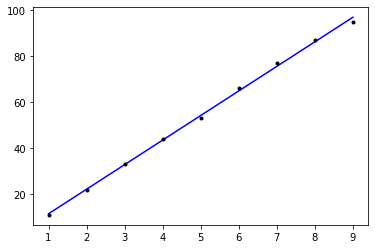

In [4]:
import matplotlib.pyplot as plt

pred = x * W + b
pred = pred.detach().numpy()
print(pred)

x = x.detach().numpy()
y = y.detach().numpy()

plt.plot(x, pred, 'b', x, y, 'k.')

### multi-variable, torch

In [5]:
x = [[73, 80, 75], 
     [93, 88, 93], 
     [89, 91, 80], 
     [96, 98, 100], 
     [73, 66, 70]]
y = [[152], [185], [180], [196], [142]]
x = torch.FloatTensor(x) 
y = torch.FloatTensor(y)

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1e-5)

epochs = 20
for epoch in range(epochs+1):
    
    pred = x.matmul(W) + b
    
    cost = torch.mean((pred - y) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%2==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')

Epoch:    0 Cost: 29661.800781
Epoch:    2 Cost: 3069.590088
Epoch:    4 Cost: 322.482086
Epoch:    6 Cost: 38.687496
Epoch:    8 Cost: 9.365656
Epoch:   10 Cost: 6.331847
Epoch:   12 Cost: 6.013817
Epoch:   14 Cost: 5.976325
Epoch:   16 Cost: 5.967835
Epoch:   18 Cost: 5.962291
Epoch:   20 Cost: 5.957089


### single-variable, nn.Module

In [6]:
x = [[1], [2], [3], [4], [5], [6], [7], [8], [9]]
y = [[11], [22], [33], [44], [53], [66], [77], [87], [95]]
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

model = nn.Linear(1, 1) # (in_features, out_features)
# model에는 W와 b가 저장되어 있음

print(list(model.parameters()))
# 각각 W와 b
# 랜덤 초기화

[Parameter containing:
tensor([[0.1018]], requires_grad=True), Parameter containing:
tensor([0.0406], requires_grad=True)]


In [7]:
# previously,
# optimizer = optim.SGD([W, b], lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01) 

epochs = 2000
for epoch in range(epochs+1):
    
    pred = model(x)
    
    # previously,
    # cost = torch.mean((pred - y) ** 2)    
    cost = F.mse_loss(pred, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%200==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')

Epoch:    0 Cost: 3628.264648
Epoch:  200 Cost: 1.092319
Epoch:  400 Cost: 1.066130
Epoch:  600 Cost: 1.061084
Epoch:  800 Cost: 1.060109
Epoch: 1000 Cost: 1.059920
Epoch: 1200 Cost: 1.059882
Epoch: 1400 Cost: 1.059876
Epoch: 1600 Cost: 1.059874
Epoch: 1800 Cost: 1.059878
Epoch: 2000 Cost: 1.059879


In [8]:
x_test = torch.FloatTensor([[5]])
output = model(x_test)
output

tensor([[54.2223]], grad_fn=<AddmmBackward0>)

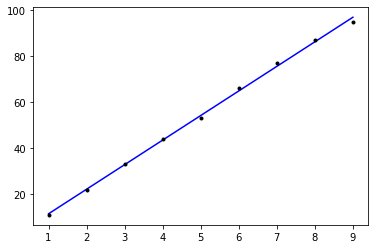

In [9]:
pred = model(x)
pred = pred.detach().numpy()
x = x.detach().numpy()
y = y.detach().numpy()

plt.plot(x, pred, 'b', x, y, 'k.')

### multi-variable, nn.Module

In [10]:
x = [[73, 80, 75], 
     [93, 88, 93], 
     [89, 91, 80], 
     [96, 98, 100], 
     [73, 66, 70]]
y = [[152], [185], [180], [196], [142]]
x = torch.FloatTensor(x) 
y = torch.FloatTensor(y)

model = nn.Linear(3, 1)

print(list(model.parameters()))

[Parameter containing:
tensor([[-0.4907, -0.3836, -0.4396]], requires_grad=True), Parameter containing:
tensor([0.2206], requires_grad=True)]


In [11]:
optimizer = optim.SGD(model.parameters(), lr=1e-5) 

epochs = 2000
for epoch in range(epochs+1):
    
    pred = model(x)
    
    cost = F.mse_loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%200==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')

Epoch:    0 Cost: 80441.710938
Epoch:  200 Cost: 5.822568
Epoch:  400 Cost: 5.376752
Epoch:  600 Cost: 4.968310
Epoch:  800 Cost: 4.593836
Epoch: 1000 Cost: 4.250171
Epoch: 1200 Cost: 3.934615
Epoch: 1400 Cost: 3.644592
Epoch: 1600 Cost: 3.377887
Epoch: 1800 Cost: 3.132433
Epoch: 2000 Cost: 2.906443


In [12]:
x_test = torch.FloatTensor([[73, 80, 75]]) 
output = model(x_test) 
print(output)

tensor([[153.9698]], grad_fn=<AddmmBackward0>)


### single-variable, class

In [13]:
x = [[1], [2], [3], [4], [5], [6], [7], [8], [9]]
y = [[11], [22], [33], [44], [53], [66], [77], [87], [95]]
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

# previously,
# model = nn.Linear(1, 1)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)
    
model = LinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 2000
for epoch in range(epochs+1):
    
    pred = model(x)
    
    cost = F.mse_loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%200==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')

Epoch:    0 Cost: 4251.555664
Epoch:  200 Cost: 1.138181
Epoch:  400 Cost: 1.074971
Epoch:  600 Cost: 1.062785
Epoch:  800 Cost: 1.060438
Epoch: 1000 Cost: 1.059987
Epoch: 1200 Cost: 1.059900
Epoch: 1400 Cost: 1.059882
Epoch: 1600 Cost: 1.059877
Epoch: 1800 Cost: 1.059874
Epoch: 2000 Cost: 1.059876


### multi-variable, class

In [14]:
x = [[73, 80, 75], 
     [93, 88, 93], 
     [89, 91, 80], 
     [96, 98, 100], 
     [73, 66, 70]]
y = [[152], [185], [180], [196], [142]]
x = torch.FloatTensor(x) 
y = torch.FloatTensor(y)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(self, x):
        return self.linear(x)
    
model = LinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-5) 

epochs = 2000
for epoch in range(epochs+1):
    
    pred = model(x)
    
    cost = F.mse_loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%200==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')

Epoch:    0 Cost: 20691.876953
Epoch:  200 Cost: 8.830656
Epoch:  400 Cost: 8.053659
Epoch:  600 Cost: 7.353873
Epoch:  800 Cost: 6.722710
Epoch: 1000 Cost: 6.152703
Epoch: 1200 Cost: 5.637233
Epoch: 1400 Cost: 5.170412
Epoch: 1600 Cost: 4.747117
Epoch: 1800 Cost: 4.362820
Epoch: 2000 Cost: 4.013472


### multi-variable, dataloader

In [15]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x = [[73, 80, 75], 
     [93, 88, 93], 
     [89, 91, 80], 
     [96, 98, 100], 
     [73, 66, 70]]
y = [[152], [185], [180], [196], [142]]
x = torch.FloatTensor(x) 
y = torch.FloatTensor(y)

dataset = TensorDataset(x, y)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(self, x):
        return self.linear(x)
    
model = LinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-5) 

epochs = 10
for epoch in range(epochs+1):
    for batch_index, samples, in enumerate(dataloader):
        x, y = samples
        
        pred = model(x)
        
        cost = F.mse_loss(pred, y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print(f'Epoch: {epoch:4d} Batch: {batch_index+1} Cost: {cost.item():.6f}')

Epoch:    0 Batch: 1 Cost: 37832.964844
Epoch:    0 Batch: 2 Cost: 5383.711914
Epoch:    0 Batch: 3 Cost: 4050.090332
Epoch:    1 Batch: 1 Cost: 877.398438
Epoch:    1 Batch: 2 Cost: 289.127350
Epoch:    1 Batch: 3 Cost: 81.386353
Epoch:    2 Batch: 1 Cost: 10.878538
Epoch:    2 Batch: 2 Cost: 20.967859
Epoch:    2 Batch: 3 Cost: 44.585209
Epoch:    3 Batch: 1 Cost: 6.106197
Epoch:    3 Batch: 2 Cost: 12.443077
Epoch:    3 Batch: 3 Cost: 0.103541
Epoch:    4 Batch: 1 Cost: 3.841705
Epoch:    4 Batch: 2 Cost: 13.074860
Epoch:    4 Batch: 3 Cost: 0.015257
Epoch:    5 Batch: 1 Cost: 12.749397
Epoch:    5 Batch: 2 Cost: 0.349156
Epoch:    5 Batch: 3 Cost: 7.768914
Epoch:    6 Batch: 1 Cost: 12.609869
Epoch:    6 Batch: 2 Cost: 4.564456
Epoch:    6 Batch: 3 Cost: 8.409787
Epoch:    7 Batch: 1 Cost: 17.992006
Epoch:    7 Batch: 2 Cost: 8.412210
Epoch:    7 Batch: 3 Cost: 1.334093
Epoch:    8 Batch: 1 Cost: 13.621430
Epoch:    8 Batch: 2 Cost: 3.539710
Epoch:    8 Batch: 3 Cost: 0.133820
Epoc

### multi-variable, custom dataset

In [16]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx): # 1회 샘플
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
    
dataset = CustomDataset()

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(self, x):
        return self.linear(x)
    
model = LinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-5) 

epochs = 10
for epoch in range(epochs+1):
    for batch_index, samples, in enumerate(dataloader):
        x, y = samples
        
        pred = model(x)
        
        cost = F.mse_loss(pred, y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print(f'Epoch: {epoch:4d} Batch: {batch_index+1} Cost: {cost.item():.6f}')

Epoch:    0 Batch: 1 Cost: 36806.976562
Epoch:    0 Batch: 2 Cost: 12693.960938
Epoch:    0 Batch: 3 Cost: 6318.707031
Epoch:    1 Batch: 1 Cost: 836.869263
Epoch:    1 Batch: 2 Cost: 291.096802
Epoch:    1 Batch: 3 Cost: 203.629105
Epoch:    2 Batch: 1 Cost: 24.184956
Epoch:    2 Batch: 2 Cost: 16.165405
Epoch:    2 Batch: 3 Cost: 0.061444
Epoch:    3 Batch: 1 Cost: 10.490104
Epoch:    3 Batch: 2 Cost: 5.714315
Epoch:    3 Batch: 3 Cost: 20.054779
Epoch:    4 Batch: 1 Cost: 6.230009
Epoch:    4 Batch: 2 Cost: 13.505291
Epoch:    4 Batch: 3 Cost: 12.005566
Epoch:    5 Batch: 1 Cost: 4.759525
Epoch:    5 Batch: 2 Cost: 25.051466
Epoch:    5 Batch: 3 Cost: 1.494329
Epoch:    6 Batch: 1 Cost: 1.125180
Epoch:    6 Batch: 2 Cost: 18.490128
Epoch:    6 Batch: 3 Cost: 19.577412
Epoch:    7 Batch: 1 Cost: 4.173748
Epoch:    7 Batch: 2 Cost: 11.820674
Epoch:    7 Batch: 3 Cost: 15.244369
Epoch:    8 Batch: 1 Cost: 6.523158
Epoch:    8 Batch: 2 Cost: 6.630757
Epoch:    8 Batch: 3 Cost: 19.447594

## Logistic Regression

### single-variable binary, torch

In [17]:
x = [-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50]
y = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

epochs = 1000
for epoch in range(epochs+1):
    
    pred = 1/(1+torch.exp(-(x*W+b)))
    
    # mean of it
    cost = -(y * torch.log(pred) + (1-y) * torch.log(1-pred)).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')    

Epoch:    0 Cost: 0.693147
Epoch:  100 Cost: 0.187938
Epoch:  200 Cost: 0.176904
Epoch:  300 Cost: 0.167174
Epoch:  400 Cost: 0.158562
Epoch:  500 Cost: 0.150915
Epoch:  600 Cost: 0.144098
Epoch:  700 Cost: 0.137998
Epoch:  800 Cost: 0.132516
Epoch:  900 Cost: 0.127568
Epoch: 1000 Cost: 0.123085


In [18]:
output = 1/(1+torch.exp(-(x*W+b)))
output = output.detach().numpy()
output

array([1.78824541e-06, 2.12113300e-05, 2.51546036e-04, 2.97564943e-03,
       3.41913551e-02, 1.08676426e-01, 2.95738816e-01, 5.91214299e-01,
       8.32806230e-01, 9.83356714e-01, 9.98575211e-01, 9.99879718e-01,
       9.99989867e-01], dtype=float32)

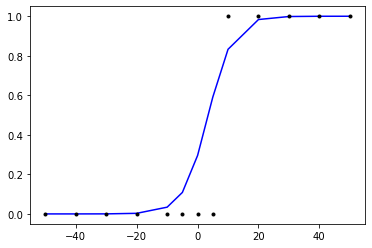

In [19]:
x = x.detach().numpy()
y = y.detach().numpy()
plt.plot(x, output, 'b', x, y, 'k.')

### multi-variable binary, torch

In [20]:
x = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [[0], [0], [0], [1], [1], [1]]
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# previously,
# pred = 1/(1+torch.exp(-(x.matmul(W)+b)))
pred = torch.sigmoid(x.matmul(W)+b)

print(pred)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [21]:
loss = -(y[0] * torch.log(pred[0]) + (1-y[0]) * torch.log(1-pred[0]))
loss

tensor([0.6931], grad_fn=<NegBackward0>)

In [22]:
losses = -(y * torch.log(pred) + (1-y) * torch.log(1-pred))
losses

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)

In [23]:
cost = losses.mean()
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [24]:
optimizer = optim.SGD([W, b], lr=1)

epochs = 1000
for epoch in range(epochs+1):
    
    pred = torch.sigmoid(x.matmul(W)+b)
    
    # mean of it
    cost = -(y * torch.log(pred) + (1-y) * torch.log(1-pred)).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')    

Epoch:    0 Cost: 0.693147
Epoch:  100 Cost: 0.134722
Epoch:  200 Cost: 0.080643
Epoch:  300 Cost: 0.057900
Epoch:  400 Cost: 0.045300
Epoch:  500 Cost: 0.037261
Epoch:  600 Cost: 0.031673
Epoch:  700 Cost: 0.027556
Epoch:  800 Cost: 0.024394
Epoch:  900 Cost: 0.021888
Epoch: 1000 Cost: 0.019852


In [25]:
pred = torch.sigmoid(x.matmul(W)+b)
print(pred)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [26]:
prediction = pred>=torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [27]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


### multi-variable binary, nn.Module

In [28]:
x = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [[0], [0], [0], [1], [1], [1]]
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

model = nn.Sequential(
    nn.Linear(2, 1), 
    nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 100
for epoch in range(epochs+1):
    
    pred = model(x)
    
    # previously,
    # cost = -(y * torch.log(pred) + (1-y) * torch.log(1-pred)).mean()
    cost = F.binary_cross_entropy(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%10==0:
        prediction = pred>=torch.FloatTensor([0.5])
        correct_prediction = prediction.float()==y
        accuracy = correct_prediction.sum().item()/len(correct_prediction)
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f} Accuracy: {accuracy:2.2f}')

Epoch:    0 Cost: 1.260569 Accuracy: 0.17
Epoch:   10 Cost: 0.427453 Accuracy: 0.83
Epoch:   20 Cost: 0.581120 Accuracy: 0.83
Epoch:   30 Cost: 0.466690 Accuracy: 0.83
Epoch:   40 Cost: 0.380960 Accuracy: 0.83
Epoch:   50 Cost: 0.300757 Accuracy: 0.83
Epoch:   60 Cost: 0.230025 Accuracy: 0.83
Epoch:   70 Cost: 0.179350 Accuracy: 1.00
Epoch:   80 Cost: 0.154282 Accuracy: 1.00
Epoch:   90 Cost: 0.142067 Accuracy: 1.00
Epoch:  100 Cost: 0.132544 Accuracy: 1.00


In [29]:
model(x)

tensor([[0.0234],
        [0.1465],
        [0.2699],
        [0.7981],
        [0.9499],
        [0.9839]], grad_fn=<SigmoidBackward0>)

In [30]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.5681, 0.4006]], requires_grad=True), Parameter containing:
tensor([-6.1000], requires_grad=True)]


### multi-variable binary, class

In [31]:
x = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [[0], [0], [0], [1], [1], [1]]
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()
    
optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 100
for epoch in range(epochs+1):
    
    pred = model(x)
    
    cost = F.binary_cross_entropy(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%10==0:
        prediction = pred>=torch.FloatTensor([0.5])
        correct_prediction = prediction.float()==y
        accuracy = correct_prediction.sum().item()/len(correct_prediction)
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f} Accuracy: {accuracy:2.2f}')

Epoch:    0 Cost: 0.683832 Accuracy: 0.50
Epoch:   10 Cost: 0.730498 Accuracy: 0.67
Epoch:   20 Cost: 0.610570 Accuracy: 0.83
Epoch:   30 Cost: 0.503967 Accuracy: 0.83
Epoch:   40 Cost: 0.417193 Accuracy: 0.83
Epoch:   50 Cost: 0.334765 Accuracy: 0.83
Epoch:   60 Cost: 0.258952 Accuracy: 0.83
Epoch:   70 Cost: 0.198110 Accuracy: 0.83
Epoch:   80 Cost: 0.162520 Accuracy: 1.00
Epoch:   90 Cost: 0.146767 Accuracy: 1.00
Epoch:  100 Cost: 0.136500 Accuracy: 1.00


### multi-variable multi-class, torch

In [32]:
x = [[1, 2, 1, 1],
     [2, 1, 3, 2],
     [3, 1, 3, 4],
     [4, 1, 5, 5],
     [1, 7, 5, 5],
     [1, 2, 5, 6],
     [1, 6, 6, 6],
     [1, 7, 7, 7]]
y = [2, 2, 2, 1, 1, 1, 0, 0]
x = torch.FloatTensor(x)
y = torch.LongTensor(y)
print(y)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot)

tensor([2, 2, 2, 1, 1, 1, 0, 0])
tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])


In [33]:
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

epochs = 1000
for epoch in range(epochs+1):
    
    z = x.matmul(W)+b
    # F.log_softmax() = torch.log(F.softmax())
    # F.cross_entropy() = F.nll_loss(F.log_softmax())
    # F.cross_entropy()는 softmax함수까지 포함하고 있음
    cost = F.cross_entropy(z, y)
    # F.cross_entropy()의 레이블은 원-핫 인코딩이 아님
    # to_one_hot_vector 함수가 내장되어 있음
    # one-hot vectors are memory inefficient
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')  

Epoch:    0 Cost: 1.098612
Epoch:  100 Cost: 0.761050
Epoch:  200 Cost: 0.689991
Epoch:  300 Cost: 0.643229
Epoch:  400 Cost: 0.604117
Epoch:  500 Cost: 0.568255
Epoch:  600 Cost: 0.533922
Epoch:  700 Cost: 0.500291
Epoch:  800 Cost: 0.466908
Epoch:  900 Cost: 0.433507
Epoch: 1000 Cost: 0.399962


### multi-variable multi-class, nn.Module

In [34]:
x = [[1, 2, 1, 1],
     [2, 1, 3, 2],
     [3, 1, 3, 4],
     [4, 1, 5, 5],
     [1, 7, 5, 5],
     [1, 2, 5, 6],
     [1, 6, 6, 6],
     [1, 7, 7, 7]]
y = [2, 2, 2, 1, 1, 1, 0, 0]
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

model = nn.Linear(4, 3)

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs+1):
    
    z = model(x)
    
    cost = F.cross_entropy(z, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')  

Epoch:    0 Cost: 0.980161
Epoch:  100 Cost: 0.634140
Epoch:  200 Cost: 0.555757
Epoch:  300 Cost: 0.503022
Epoch:  400 Cost: 0.459435
Epoch:  500 Cost: 0.420410
Epoch:  600 Cost: 0.383777
Epoch:  700 Cost: 0.348091
Epoch:  800 Cost: 0.312230
Epoch:  900 Cost: 0.275780
Epoch: 1000 Cost: 0.244954


### multi-variable multi-class, class

In [35]:
x = [[1, 2, 1, 1],
     [2, 1, 3, 2],
     [3, 1, 3, 4],
     [4, 1, 5, 5],
     [1, 7, 5, 5],
     [1, 2, 5, 6],
     [1, 6, 6, 6],
     [1, 7, 7, 7]]
y = [2, 2, 2, 1, 1, 1, 0, 0]
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)
        
    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs+1):
    
    z = model(x)
    
    cost = F.cross_entropy(z, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100==0:
        print(f'Epoch: {epoch:4d} Cost: {cost.item():.6f}')  

Epoch:    0 Cost: 2.651607
Epoch:  100 Cost: 0.730743
Epoch:  200 Cost: 0.637503
Epoch:  300 Cost: 0.577953
Epoch:  400 Cost: 0.526864
Epoch:  500 Cost: 0.479029
Epoch:  600 Cost: 0.432612
Epoch:  700 Cost: 0.386771
Epoch:  800 Cost: 0.341137
Epoch:  900 Cost: 0.296026
Epoch: 1000 Cost: 0.255381
